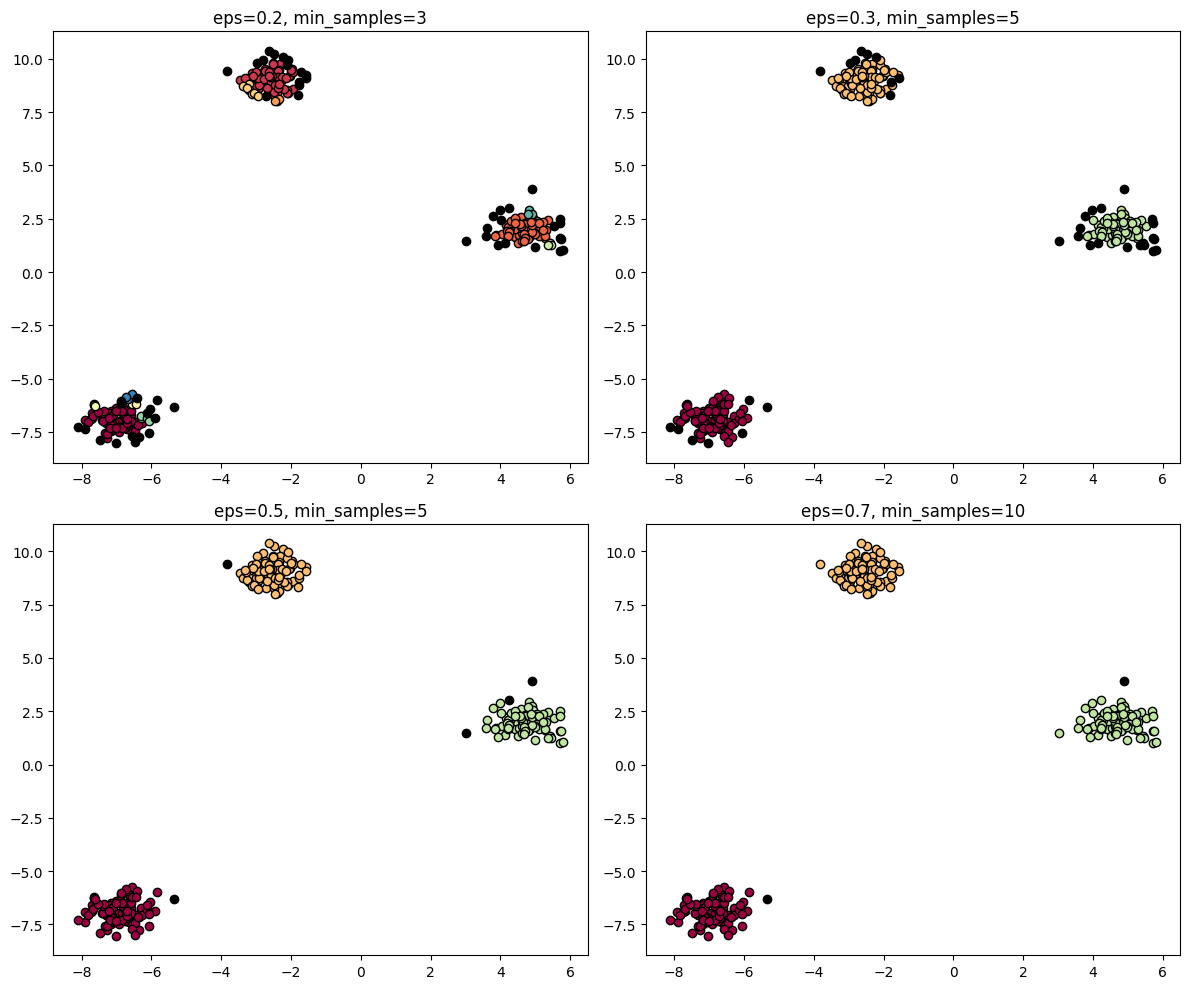

In [ ]:
# Question 5: Experiment with DBSCAN Parameters (eps and min_samples)
# Description: Explore how changing DBSCAN parameters affects clustering.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

params = [(0.2, 3), (0.3, 5), (0.5, 5), (0.7, 10)]

for ax, (eps, min_samples) in zip(axes.ravel(), params):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
    ax.set_title(f'eps={eps}, min_samples={min_samples}')

plt.tight_layout()
plt.show()
